# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies
import pandas as pd 
import requests
import json 
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key 

# Import citipy for cities based on latitude and longitude
from citipy import citipy

# Range of latitude and longitude
latitude = (-90,90)
longitude = (-180,180)


## Generate Cities List

In [2]:
# List to hold cites and latitude/longitude
cities = []
lat_lon = []

# Create random latitude/longitude
lat = np.random.uniform(low=-90.000, high=90.000, size=1400)
lon = np.random.uniform(low=-180.000, high=180.000, size=1400)
lat_longs = zip(lat,lon)

# Identify nearest city for each latitude/longitude combination
for lat_lon in lat_longs:
    city = citipy.nearest_city(lat_lon[0], lat_lon[1]).city_name
    
    # If the city is unique, then add it to cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))



575


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&"

# Message for user
print("Beginning Data Retrieval")
print("........................")

city_info = []

count = 0 

for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    city_weather = requests.get(query_url).json()

    print("Processing Record", count, "of", len(cities), city,)
    
    try:
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
# Write to list 
        city_info.append({"City":city, "Country": city_country, "Date": city_date, "Latitude": city_lat, 
                        "Longitude":city_lng, "Max Temperature": city_max_temp, "Humidity": city_humidity, 
                         "Cloudiness": city_clouds, "Wind Speed": city_wind})
    except:
        print("City not found. Skipping.........")
        pass

    count = count + 1

print(".......................")
print("Data Retrieval Complete")
print(".......................")


cessing Record 91 of 575 bambanglipuro
Processing Record 92 of 575 marcona
City not found. Skipping.........
Processing Record 93 of 575 ormara
Processing Record 94 of 575 pando
Processing Record 95 of 575 romny
Processing Record 96 of 575 hambantota
Processing Record 97 of 575 itoman
Processing Record 98 of 575 sitka
Processing Record 99 of 575 candido mendes
Processing Record 100 of 575 muros
Processing Record 101 of 575 new norfolk
Processing Record 102 of 575 mocambique
City not found. Skipping.........
Processing Record 103 of 575 santander
Processing Record 104 of 575 menongue
Processing Record 105 of 575 carnarvon
Processing Record 106 of 575 port keats
Processing Record 107 of 575 kenai
Processing Record 108 of 575 kodinsk
Processing Record 109 of 575 obluche
City not found. Skipping.........
Processing Record 110 of 575 dali
Processing Record 111 of 575 coolum beach
Processing Record 112 of 575 yeppoon
Processing Record 113 of 575 pisco
Processing Record 114 of 575 chokurdakh


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Crate Dataframe
city_df = pd.DataFrame(city_info)

# Export Dataframe to csv
city_df.to_csv("../output_data/city.csv")

# Display Dataframe
city_df.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,burlatskoye,RU,1612079537,45.0564,43.6350,4.03,83,100,4.23
1,saint-philippe,RE,1612079537,-21.3585,55.7679,32.00,58,0,11.83
2,busselton,AU,1612079537,-33.6500,115.3333,33.33,43,0,4.02
3,karratha,AU,1612079537,-20.7377,116.8463,31.90,58,100,9.21
4,balaipungut,ID,1612079538,1.0500,101.2833,30.00,58,40,0.45


In [5]:
city_df.describe()

,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
count,5.210000e+02,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000
mean,1.612080e+09,19.295363,20.258407,10.298599,73.092131,54.364683,3.790653
std,1.078793e+02,33.594734,90.151136,18.951583,21.122972,40.010352,2.716993
min,1.612079e+09,-54.800000,-179.166700,-44.330000,12.000000,0.000000,0.060000
25%,1.612080e+09,-8.613600,-58.285600,-2.480000,64.000000,13.000000,1.690000
50%,1.612080e+09,22.566700,25.570100,17.220000,79.000000,68.000000,3.090000
75%,1.612080e+09,49.783300,98.779200,24.980000,88.000000,96.000000,5.140000
max,1.612080e+09,78.218600,179.316700,39.000000,100.000000,100.000000,17.000000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

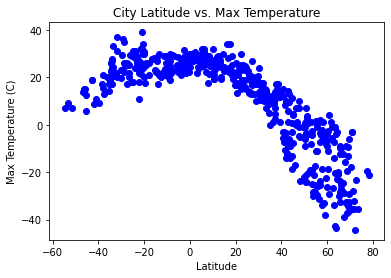

In [8]:
# Creating plot
plt.scatter(city_df["Latitude"], city_df["Max Temperature"], marker = "o", color = "blue")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Max Temperature")
plt.savefig("../output_data/Lat_vs_temp_plot")
plt.show()

# The below graph is analysing the latitude of a city in both the Northern and Southern Hemispheres and plotting this position against the recorded maximum temperature.  From the visualisation the first thing that stands out it that the temperature in the Northern Hemisphere are significantly colder than those in the Southern Hemisphere.

## Latitude vs. Humidity Plot

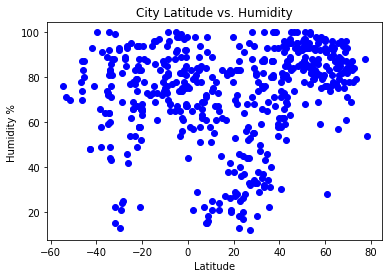

In [9]:
# Creating plot
plt.scatter(city_df["Latitude"], city_df["Humidity"], marker = "o", color = "blue")
plt.xlabel("Latitude")
plt.ylabel("Humidity % ")
plt.title(f"City Latitude vs. Humidity")
plt.savefig("../output_data/Lat_vs_humidity_plot")
plt.show()

# The below graph is analysing the latitude of a city in both the Northern and Southern Hemispheres and plotting this position against the recorded humidity.  This graphs visualisation is not as defined as the temperature, however there appears to be a cluster of data at 50 to 70 latitude sitting above 75% humidity.

## Latitude vs. Cloudiness Plot

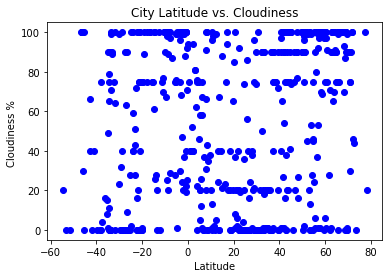

In [10]:
# Creating plot
plt.scatter(city_df["Latitude"], city_df["Cloudiness"], marker = "o", color = "blue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness % ")
plt.title(f"City Latitude vs. Cloudiness")
plt.savefig("../output_data/Lat_vs_cloudiness_plot")
plt.show()

# The below graph is analysing the latitude of a city in both the Northern and Southern Hemispheres and plotting this position against the recorded cloudiness.  This graph shows us that the cloud cover can vary significantly at the same point of latitude.  You can see quite clear lines of cloud cover at 0%, 20%,40%,75%,90% and 100%.  I feel cloudiness data needs to be used in conjunction with other data to look at comparisons.

## Latitude vs. Wind Speed Plot

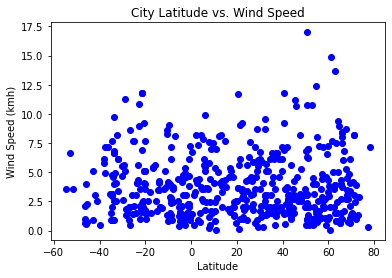

In [11]:
# Creating plot
plt.scatter(city_df["Latitude"], city_df["Wind Speed"], marker = "o", color = "blue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kmh)")
plt.title(f"City Latitude vs. Wind Speed")
plt.savefig("../output_data/Lat_vs_wind_plot")
plt.show()

# The below graph is analysing the latitude of a city in both the Northern and Southern Hemispheres and plotting this position against the recorded wind speed.  The graph shows that across all latitudes than wind speeds remained below 12.5 kmh, with a few outliers above this speed.  

## Linear Regression

In [12]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hemisphere = city_df.loc[city_df["Latitude"]>0]
Southern_hemisphere = city_df.loc[city_df["Latitude"]<0]



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7863365951040908


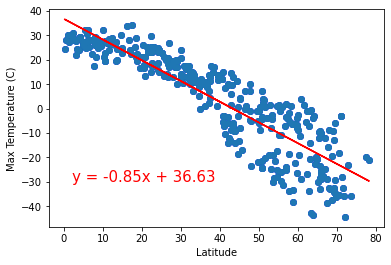

In [13]:
# Creating Plot
x_values = Northern_hemisphere["Latitude"]
y_values = Northern_hemisphere["Max Temperature"]
plt.scatter(x_values, y_values ,marker = "o", color = "blue")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,-30),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

# The below graph and r-value indicate that there is a moderate amount of correlation between Latitude and Max Temperature in the Northern Hemisphere. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.2403982670917165


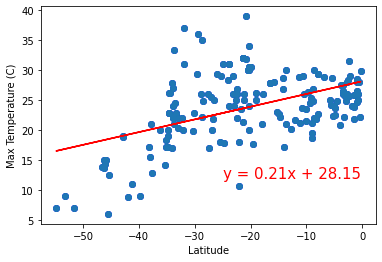

In [14]:
# Creating Plot
x_values = Southern_hemisphere["Latitude"]
y_values = Southern_hemisphere["Max Temperature"]
plt.scatter(x_values, y_values ,marker = "o", color = "blue")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,12),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

# The below graph and r-value indicate that there is little to no correlation between Latitude and Max Temperature in the Southern Hemisphere. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2138172740419102


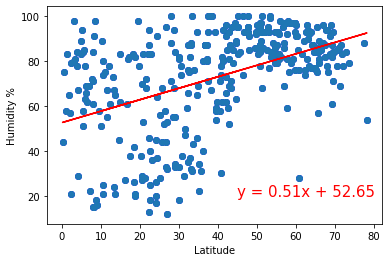

In [15]:
# Creating Plot
x_values = Northern_hemisphere["Latitude"]
y_values = Northern_hemisphere["Humidity"]
plt.scatter(x_values, y_values ,marker = "o", color = "blue")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

# The below graph and r-value indicate that there is a little to no correlation between Latitude and Humidity in the Northern Hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.03818770430352012


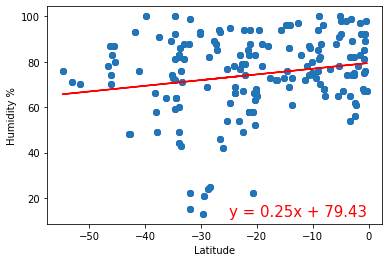

In [16]:
# Creating Plot
x_values = Southern_hemisphere["Latitude"]
y_values = Southern_hemisphere["Humidity"]
plt.scatter(x_values, y_values ,marker = "o", color = "blue")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,12),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

# The below graph and r-value indicate that there is almost no correlation between Latitude and Humidity in the Southern Hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.12860241996398714


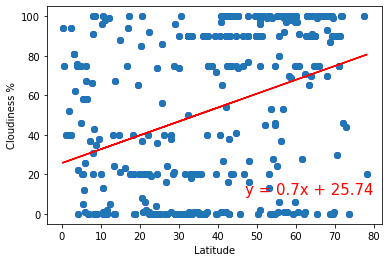

In [17]:
# Creating Plot
x_values = Northern_hemisphere["Latitude"]
y_values = Northern_hemisphere["Cloudiness"]
plt.scatter(x_values, y_values ,marker = "o", color = "blue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(47,10),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

# The below graph and r-value indicate that there is a little to no correlation between Latitude and Cloudiness in the Northern Hemisphere. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.09824747271089103


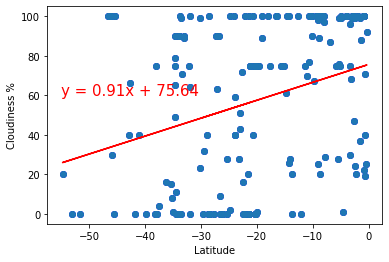

In [18]:
# Creating Plot
x_values = Southern_hemisphere["Latitude"]
y_values = Southern_hemisphere["Cloudiness"]
plt.scatter(x_values, y_values ,marker = "o", color = "blue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

# The below graph and r-value indicate that there is almost no correlation between Latitude and Cloudiness in the Southern Hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0001616260325695484


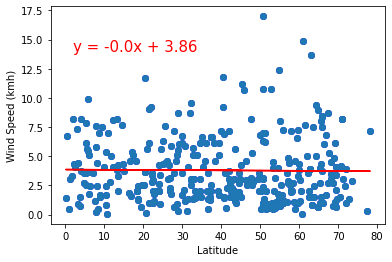

In [19]:
# Creating Plot
x_values = Northern_hemisphere["Latitude"]
y_values = Northern_hemisphere["Wind Speed"]
plt.scatter(x_values, y_values ,marker = "o", color = "blue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kmh)")

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,14),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

# The below graph and r-value indicate that there is no correlation between Latitude and Wind Speed in the Northern Hemisphere. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.010397109892726993


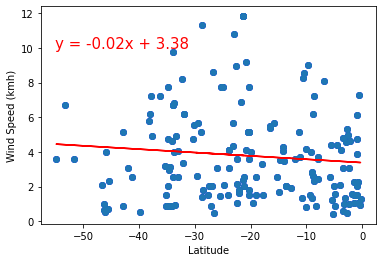

In [20]:
# Creating Plot
x_values = Southern_hemisphere["Latitude"]
y_values = Southern_hemisphere["Wind Speed"]
plt.scatter(x_values, y_values ,marker = "o", color = "blue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kmh)")

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

# The below graph and r-value indicate that there is no correlation between Latitude and Wind Speed in the Southern Hemisphere. 